## Intro to Using SP in R for Spatial Analysis

Created while working through the excellent paper posted at - https://hautahi.com/rmaps.

In [1]:
library(rgdal)
library(repr)
library(rgeos)

Loading required package: sp

rgdal: version: 1.4-8, (SVN revision 845)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.4.3, released 2019/10/28
 Path to GDAL shared files: /usr/local/share/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 5.0.1, April 1st, 2018, [PJ_VERSION: 501]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.3-2 

rgeos version: 0.5-2, (SVN revision 621)
 GEOS runtime version: 3.6.2-CAPI-1.10.2 
 Linking to sp version: 1.3-2 
 Polygon checking: TRUE 




### Open shapefiles

* __dsn__- specifies the directory the shapefiles are in
* __layer__ - specifies the name of the shapefile to open

In [2]:
port <- readOGR(dsn = "data", layer = "Police_Districts_Portland")
crime <- readOGR(dsn = "data", layer = "NIJ_Nov2016_Crime")

OGR data source with driver: ESRI Shapefile 
Source: "/home/chronos/user/Downloads/r_projects/sp_maps/data", layer: "Police_Districts_Portland"
with 60 features
It has 4 fields
OGR data source with driver: ESRI Shapefile 
Source: "/home/chronos/user/Downloads/r_projects/sp_maps/data", layer: "NIJ_Nov2016_Crime"
with 16834 features
It has 3 fields


### Plot some Layers

* __par__ - used to specify 1 row, 2 columns. Plots will start in the 1st cell.
* __plot__ - command to plot the layer. Title passed in a part of command.  _cex_ used to specify text weight

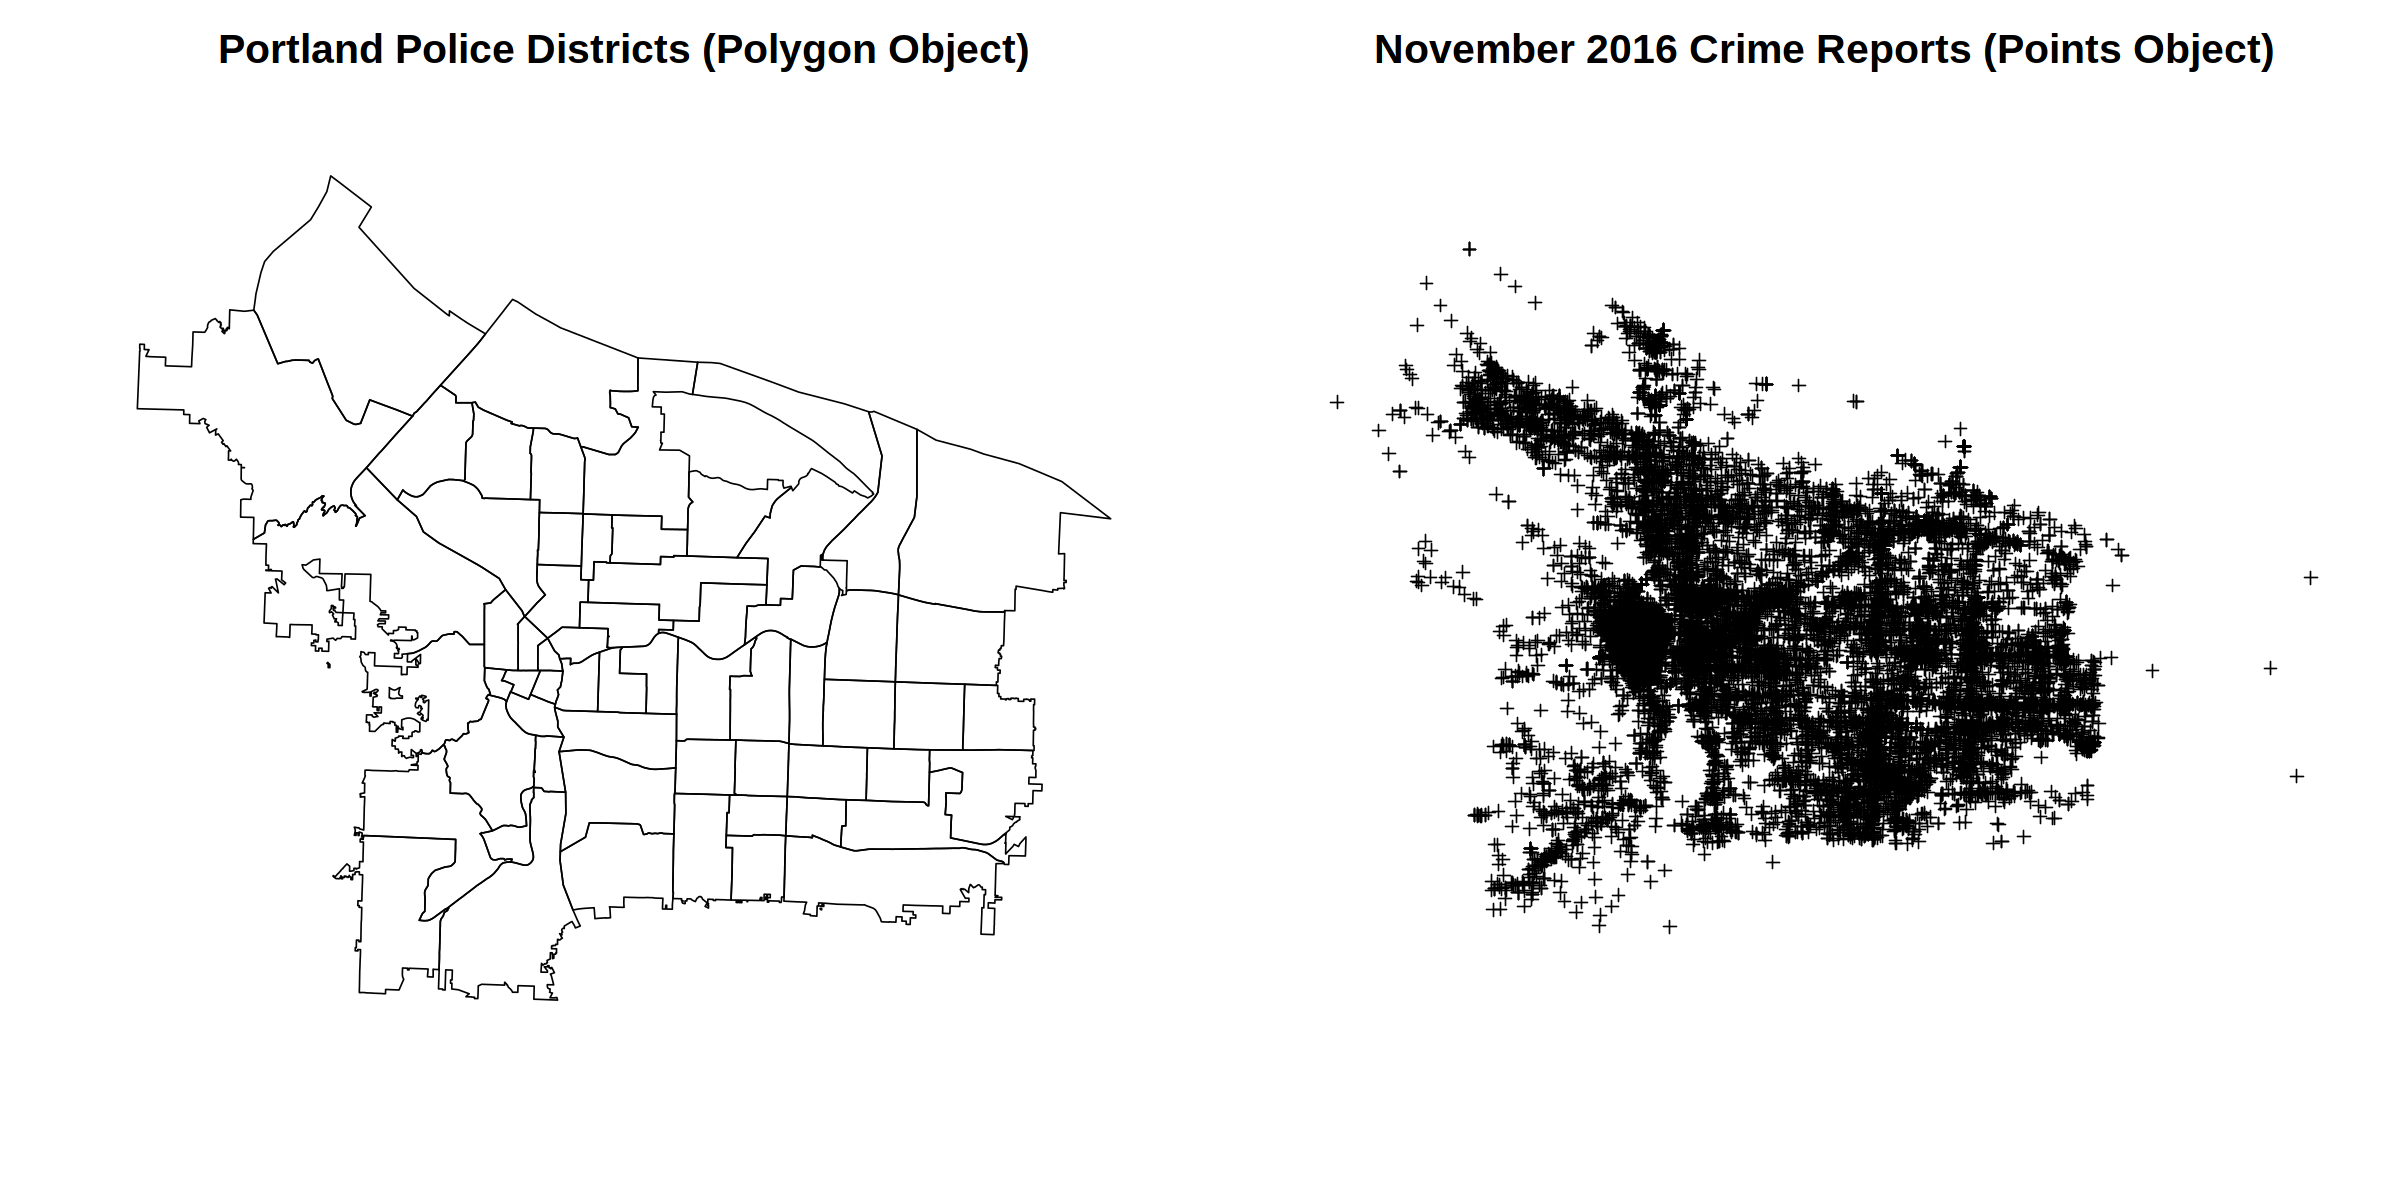

In [3]:
options(repr.plot.width=20, repr.plot.height=10)
par(mfrow=c(1,2))
plot(port); title(main = list("Portland Police Districts (Polygon Object)", cex=2))
plot(crime); title(main = list("November 2016 Crime Reports (Points Object)", cex=2))

### View some info on the loaded data

* __class__ - standard R command but in this case tells us what type of dataframe we have
* __summary__ - command is roughly equivalent to using _ogrinfo_

Incidentally, projections in __sp__ appear to be defined using standard proj4 strings.  In MazamaSpatialUtils, they are specified manually uing the proj4 string:

```
SPDF@proj4string <- sp::CRS("+proj=longlat +ellps=GRS80 +datum=NAD83 +no_defs")
```

However, it is is equally easy to specify a projection by using an EPSG code:

```
epsg_4326 <- sp::CRS("+init=epsg:4326")

# Yields...
CRS arguments:
 +init=epsg:4326 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84
+towgs84=0,0,0 
```

In [4]:
class(crime)
summary(crime)

[1] "SpatialPointsDataFrame"
attr(,"package")
[1] "sp"

Object of class SpatialPointsDataFrame
Coordinates:
              min     max
coords.x1 7608809 7717689
coords.x2  651489  727287
Is projected: TRUE 
proj4string :
[+proj=lcc +lat_1=44.33333333333334 +lat_2=46 +lat_0=43.66666666666666
+lon_0=-120.5 +x_0=2500000 +y_0=0 +ellps=GRS80 +units=ft +no_defs]
Number of points: 16834
Data attributes:
                CATEGORY           occ_date       census_tra    
 BURGLARY           :   95   2016/11/04:  645   Min.   :     0  
 MOTOR VEHICLE THEFT:  270   2016/11/03:  625   1st Qu.:  2000  
 OTHER              :13889   2016/11/05:  607   Median :  4700  
 STREET CRIMES      : 2580   2016/11/08:  607   Mean   :  6609  
                             2016/11/06:  602   3rd Qu.:  8201  
                             2016/11/01:  599   Max.   :980000  
                             (Other)   :13149                   

In [5]:
summary(port)

Object of class SpatialPolygonsDataFrame
Coordinates:
        min       max
x 7604004.6 7701431.1
y  651315.6  733815.4
Is projected: TRUE 
proj4string :
[+proj=lcc +lat_1=44.33333333333334 +lat_2=46 +lat_0=43.66666666666666
+lon_0=-120.5 +x_0=2500000 +y_0=0 +ellps=GRS80 +units=ft +no_defs]
Data attributes:
    OBJECTID   AGENCY      DISTRICT  PRECINCT
 100    : 1   PORT:60   510    : 1   CE:20   
 101    : 1             520    : 1   EA:20   
 102    : 1             530    : 1   NO:20   
 103    : 1             540    : 1           
 104    : 1             550    : 1           
 105    : 1             560    : 1           
 (Other):54             (Other):54           

### View bounding box of entire data layer

* __bbox()__ - shows the MBR for the layer

In [6]:
bbox(crime)

,min,max
coords.x1,7608809,7717689
coords.x2,651489,727287


### Coordinate Reference System Info.

The projection info is contained in the "proj4string" slot.  If we extract it from the dataframe, we see that it is an object of class "SRS".  Looking at the  _proj_string_ gives us the full proj4 string.

In [7]:
slotNames(crime)
# 'data' 'coords.nrs' 'coords' 'bbox' 'proj4string'

proj_string <- crime@proj4string

class(proj_string)
# 'CRS'

proj_string
# CRS arguments:
# +proj=lcc +lat_1=44.33333333333334 +lat_2=46 +lat_0=43.66666666666666
# +lon_0=-120.5 +x_0=2500000 +y_0=0 +ellps=GRS80 +units=ft +no_defs 

[1] "data"        "coords.nrs"  "coords"      "bbox"        "proj4string"

[1] "CRS"
attr(,"package")
[1] "sp"

CRS arguments:
 +proj=lcc +lat_1=44.33333333333334 +lat_2=46 +lat_0=43.66666666666666
+lon_0=-120.5 +x_0=2500000 +y_0=0 +ellps=GRS80 +units=ft +no_defs 

### Looking at the Data

Speaking of slots, if we want to have a look at the data itself, we grab the "data" slot.

In [8]:
crime_data <- crime@data
head(crime_data)

,CATEGORY,occ_date,census_tra
,<fct>,<fct>,<dbl>
1,STREET CRIMES,2016/11/01,5200
2,STREET CRIMES,2016/11/01,7202
3,STREET CRIMES,2016/11/01,10600
4,STREET CRIMES,2016/11/01,1101
5,STREET CRIMES,2016/11/01,2000
6,STREET CRIMES,2016/11/01,1201


In [9]:
# Look at what types of crime category exist

crime_idx <- as.factor(crime@data$CATEGORY)
levels(crime_idx)

[1] "BURGLARY"            "MOTOR VEHICLE THEFT" "OTHER"              
[4] "STREET CRIMES"

### Plot both data sets in the same map

In the previous plotting examples, we showed each layer in their own frame, plotted side by side.  We did this by using the _par_ function to split out layout pane into 2 columns, ```par(mfrow=c(1,2))```.  This is a useful way to see how they differ from one another, but now it's more useful to see them together.

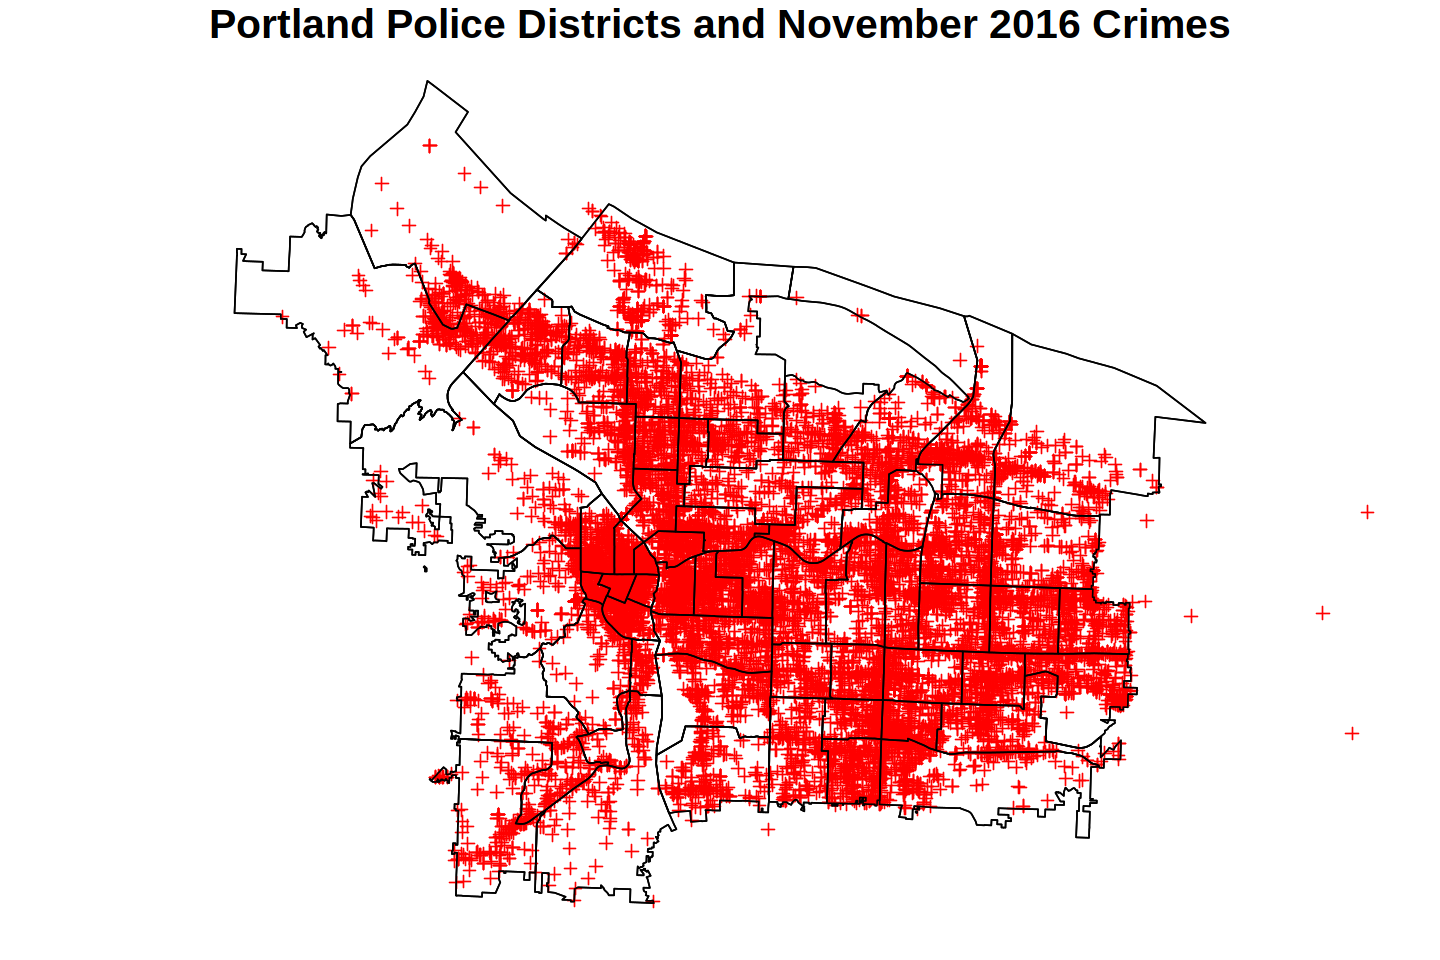

In [10]:
options(repr.plot.width=12, repr.plot.height=8)
par( mfrow = c(1,1), mar=c(1,1,2,1))

# Plot the district polygons first, then crime points on top. The extent of the plot window is 
# set by the first layer, so if we use the points first, the top and left edges of the polygons
# will be clipped.

plot(port)
plot(crime, col= "red", add = TRUE)
plot(port, add = TRUE); title(main = list("Portland Police Districts and November 2016 Crimes", cex=2))


### Spatial Subsetting

We can see from the map above that there are crime points that fall outside the police district boundaries.  These are problematic for the purpose of gathering statistics, so let's have a look at them.  

Look at the docs for rgeos: https://cran.rstudio.com/web/packages/rgeos/rgeos.pdf

Also look at spatial operation here - https://www.r-bloggers.com/clipping-spatial-data-in-r/ (shows clipping)

Good discussion of "by_id" ramifications - http://www.nickeubank.com/wp-content/uploads/2015/10/RGIS2_MergingSpatialData_part2_GeometricManipulations.html

University of Oregon examples (includes rasterizing points and regridding - http://geog.uoregon.edu/bartlein/courses/geog495/lec07.html#clippingtrimmingpoint-in-polygon-analyses




In [11]:
# Different ways to compute intersections

length(crime)

length(crime[port,])

length(raster::intersect(crime, port))

length(gIntersection(port, crime, byid = TRUE))

[1] 16834

[1] 16785

[1] 16785

[1] 16785

In [12]:
# We can use rgeos::gIntersection to get all of the points that intersect
#     inside_crime <- gIntersection(port, crime, byid = TRUE)
# but it is much, much faster to just use square-bracket subsetting.

inside_crime <- crime[port,]

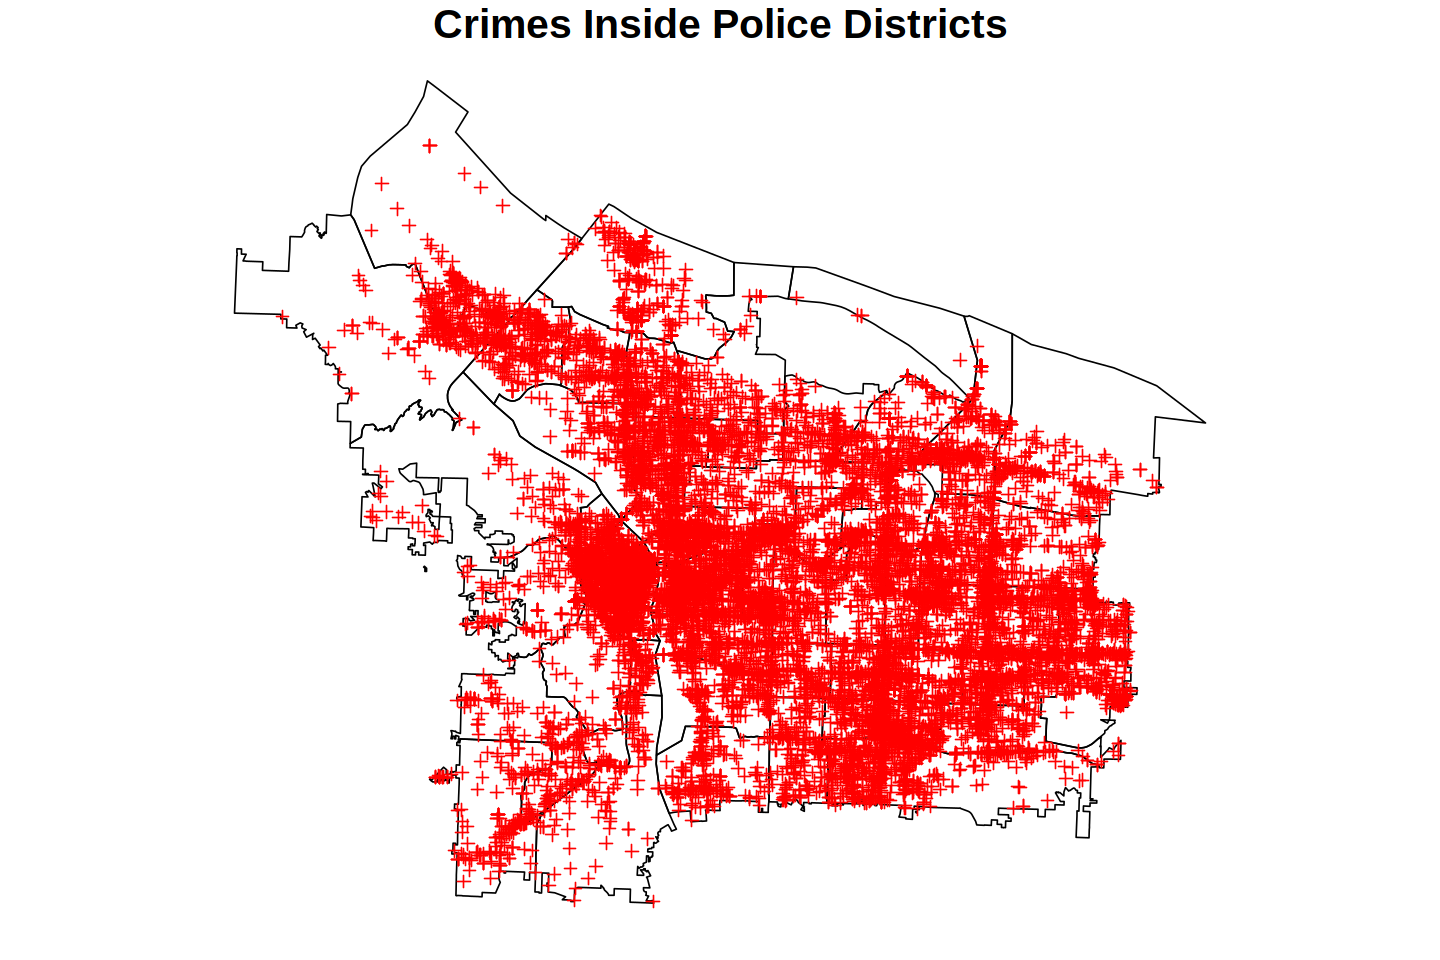

In [13]:
options(repr.plot.width=12, repr.plot.height=8)
par( mfrow = c(1,1), mar=c(1,1,2,1))

plot(port)
plot(inside_crime, col = "red", add = TRUE)
title(main = list("Crimes Inside Police Districts", cex=2))

In [14]:
# How do I select just the points which fall outside the Police Districts?  This is much
# more difficult with rgeos, as it does not work with a geometry collection.  In other words,
# it doesn't return a logical vector when used against multiple polygons.

outside <-gDisjoint(crime, port, byid = TRUE, returnDense = FALSE)
length(outside)
head(outside)

[1] 16834

$`1`
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
[51] 52 53 54 55 56 57 58 59 60

$`2`
 [1]  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
[26] 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
[51] 52 53 54 55 56 57 58 59 60

$`3`
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
[51] 52 53 54 55 56 57 58 59 60

$`4`
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25 26
[26] 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
[51] 52 53 54 55 56 57 58 59 60

$`5`
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25 26
[26] 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
[51] 52 53 54 55 56 57 58 59 60

$`6`
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24 25 26
[26] 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
[51] 52 53 54 55 56 57 58 59 60

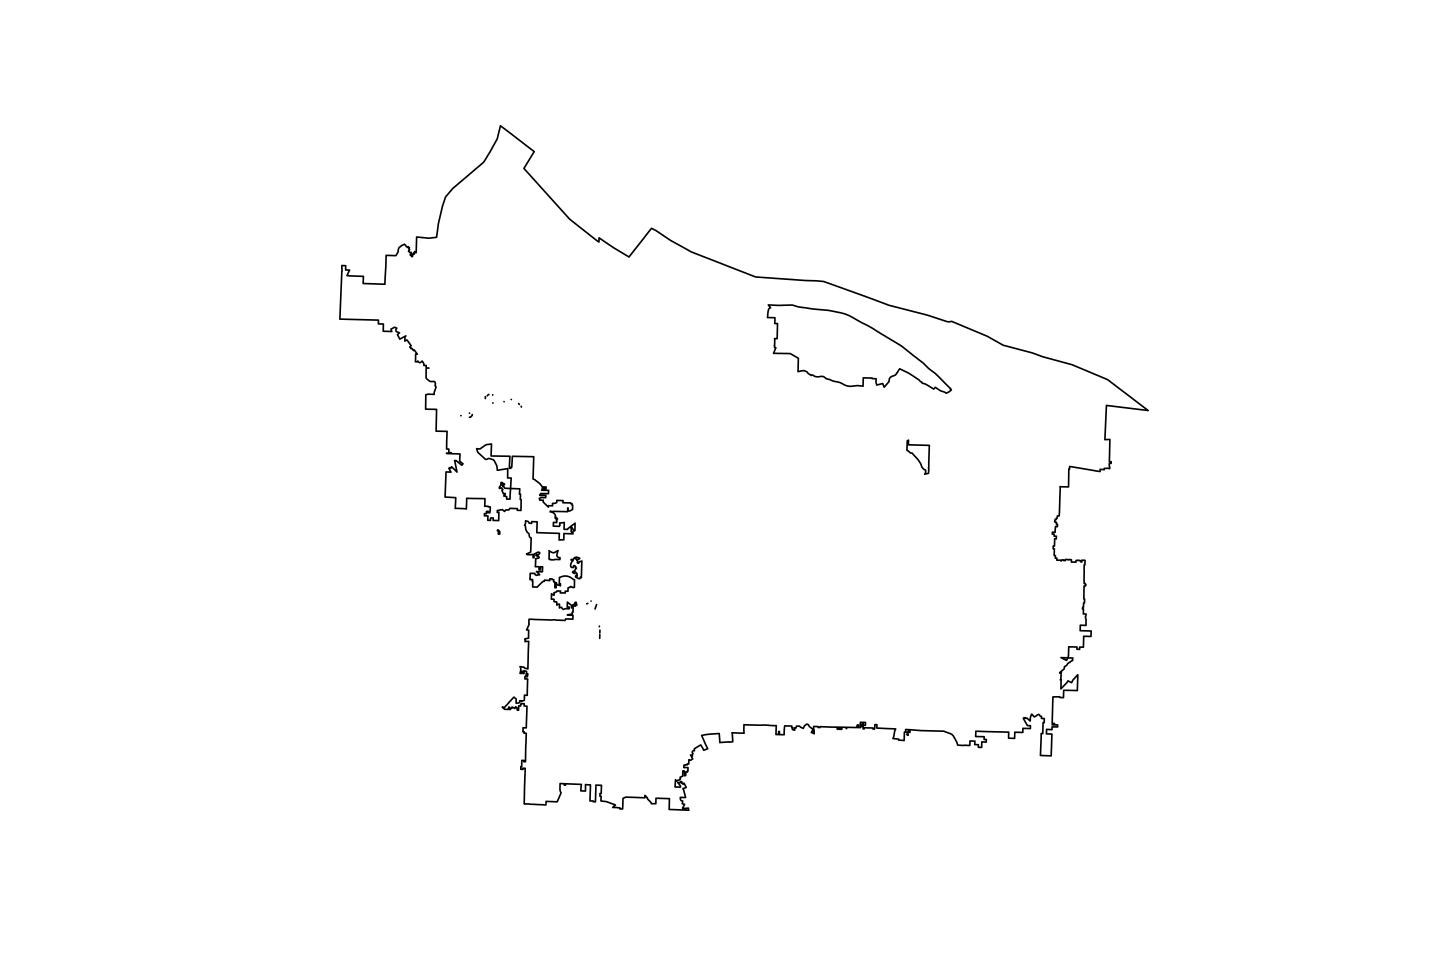

In [15]:
# Create a single polygon for gDisjoint to work agains.

portland <- gUnaryUnion(port, id = NULL, checkValidity=NULL)
plot(portland)

# NOTE there appears to be bad topology in this police district shapefile

In [16]:
# Create a logical vector of all crimes that do not intersect the dissolved Portland outline
outside_crimes <- gDisjoint(crime, portland, byid = TRUE)
head(outside_crimes)

,1,2,3,4,5,6,7,8,9,10,⋯,16825,16826,16827,16828,16829,16830,16831,16832,16833,16834
1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


[1] 49

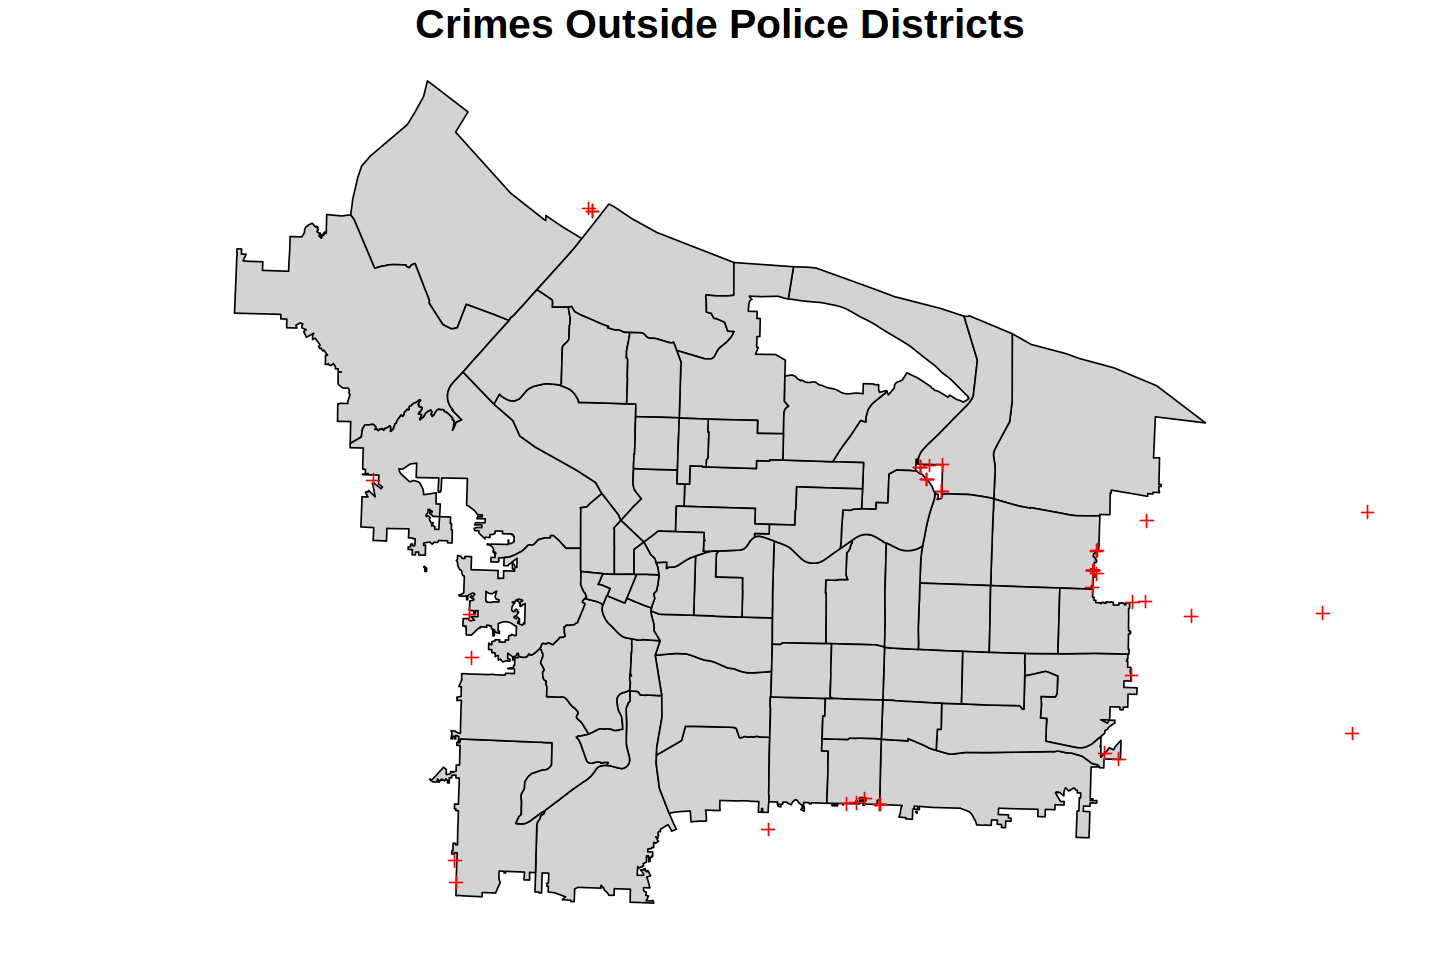

In [17]:
# Create an index of all the "TRUE" outside crimes
outside_crime_idx <- which(outside_crimes)

# Subset the outside crimes from the full crime set using their index position
my_points <- crime[outside_crime_idx,]

# Check the length and plot
options(repr.plot.width=12, repr.plot.height=8)
par( mfrow = c(1,1), mar=c(1,1,2,1))

length(my_points)
plot(port, col = "lightgray")
plot(my_points, col= "red", add = TRUE)
title(main = list("Crimes Outside Police Districts", cex=2))

# NOTE: Many of the outside crimes appear to actually be very close to a police district.
# Explore whether we can do something with buffering to only exclude points which are more than
# n meters away from a district

In [18]:
# Prove that we have separated the full set into 2 different sets properly.
length(crime)
length(inside_crime)
length(my_points)

length(crime) == length(inside_crime) + length(my_points)

[1] 16834

[1] 16785

[1] 49

[1] TRUE

In [19]:
# What are the outside_crimes? (Same as everywhere else)

unique(my_points@data$CATEGORY)

[1] STREET CRIMES       OTHER               MOTOR VEHICLE THEFT
[4] BURGLARY           
Levels: BURGLARY MOTOR VEHICLE THEFT OTHER STREET CRIMES

In [20]:
#  This counts the number of crimes in each police district polygon. Need to explore more how this works

crime_agg <- raster::aggregate(x=inside_crime["CATEGORY"], by=port,FUN=length) # Aggregate by district
tibble::glimpse(crime_agg@data)

# What we get is a number that is the count of crime points inside of each port polygon

Observations: 60
Variables: 1
$ CATEGORY <int> 262, 176, 295, 327, 210, 228, 253, 186, 285, 143, 140, 123, …


In [21]:
# While that is useful, really what I want is to have that data as a new column in my inside_crime data

port@data$CRIME_COUNT <- crime_agg@data$CATEGORY
tibble::glimpse(port@data)
summary(port@data$CRIME_COUNT)

Observations: 60
Variables: 5
$ OBJECTID    <fct> 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110…
$ AGENCY      <fct> PORT, PORT, PORT, PORT, PORT, PORT, PORT, PORT, PORT, POR…
$ DISTRICT    <fct> 510, 520, 530, 540, 550, 560, 570, 580, 590, 610, 620, 63…
$ PRECINCT    <fct> NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, N…
$ CRIME_COUNT <int> 262, 176, 295, 327, 210, 228, 253, 186, 285, 143, 140, 12…


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  109.0   194.2   280.0   279.8   345.8   512.0 

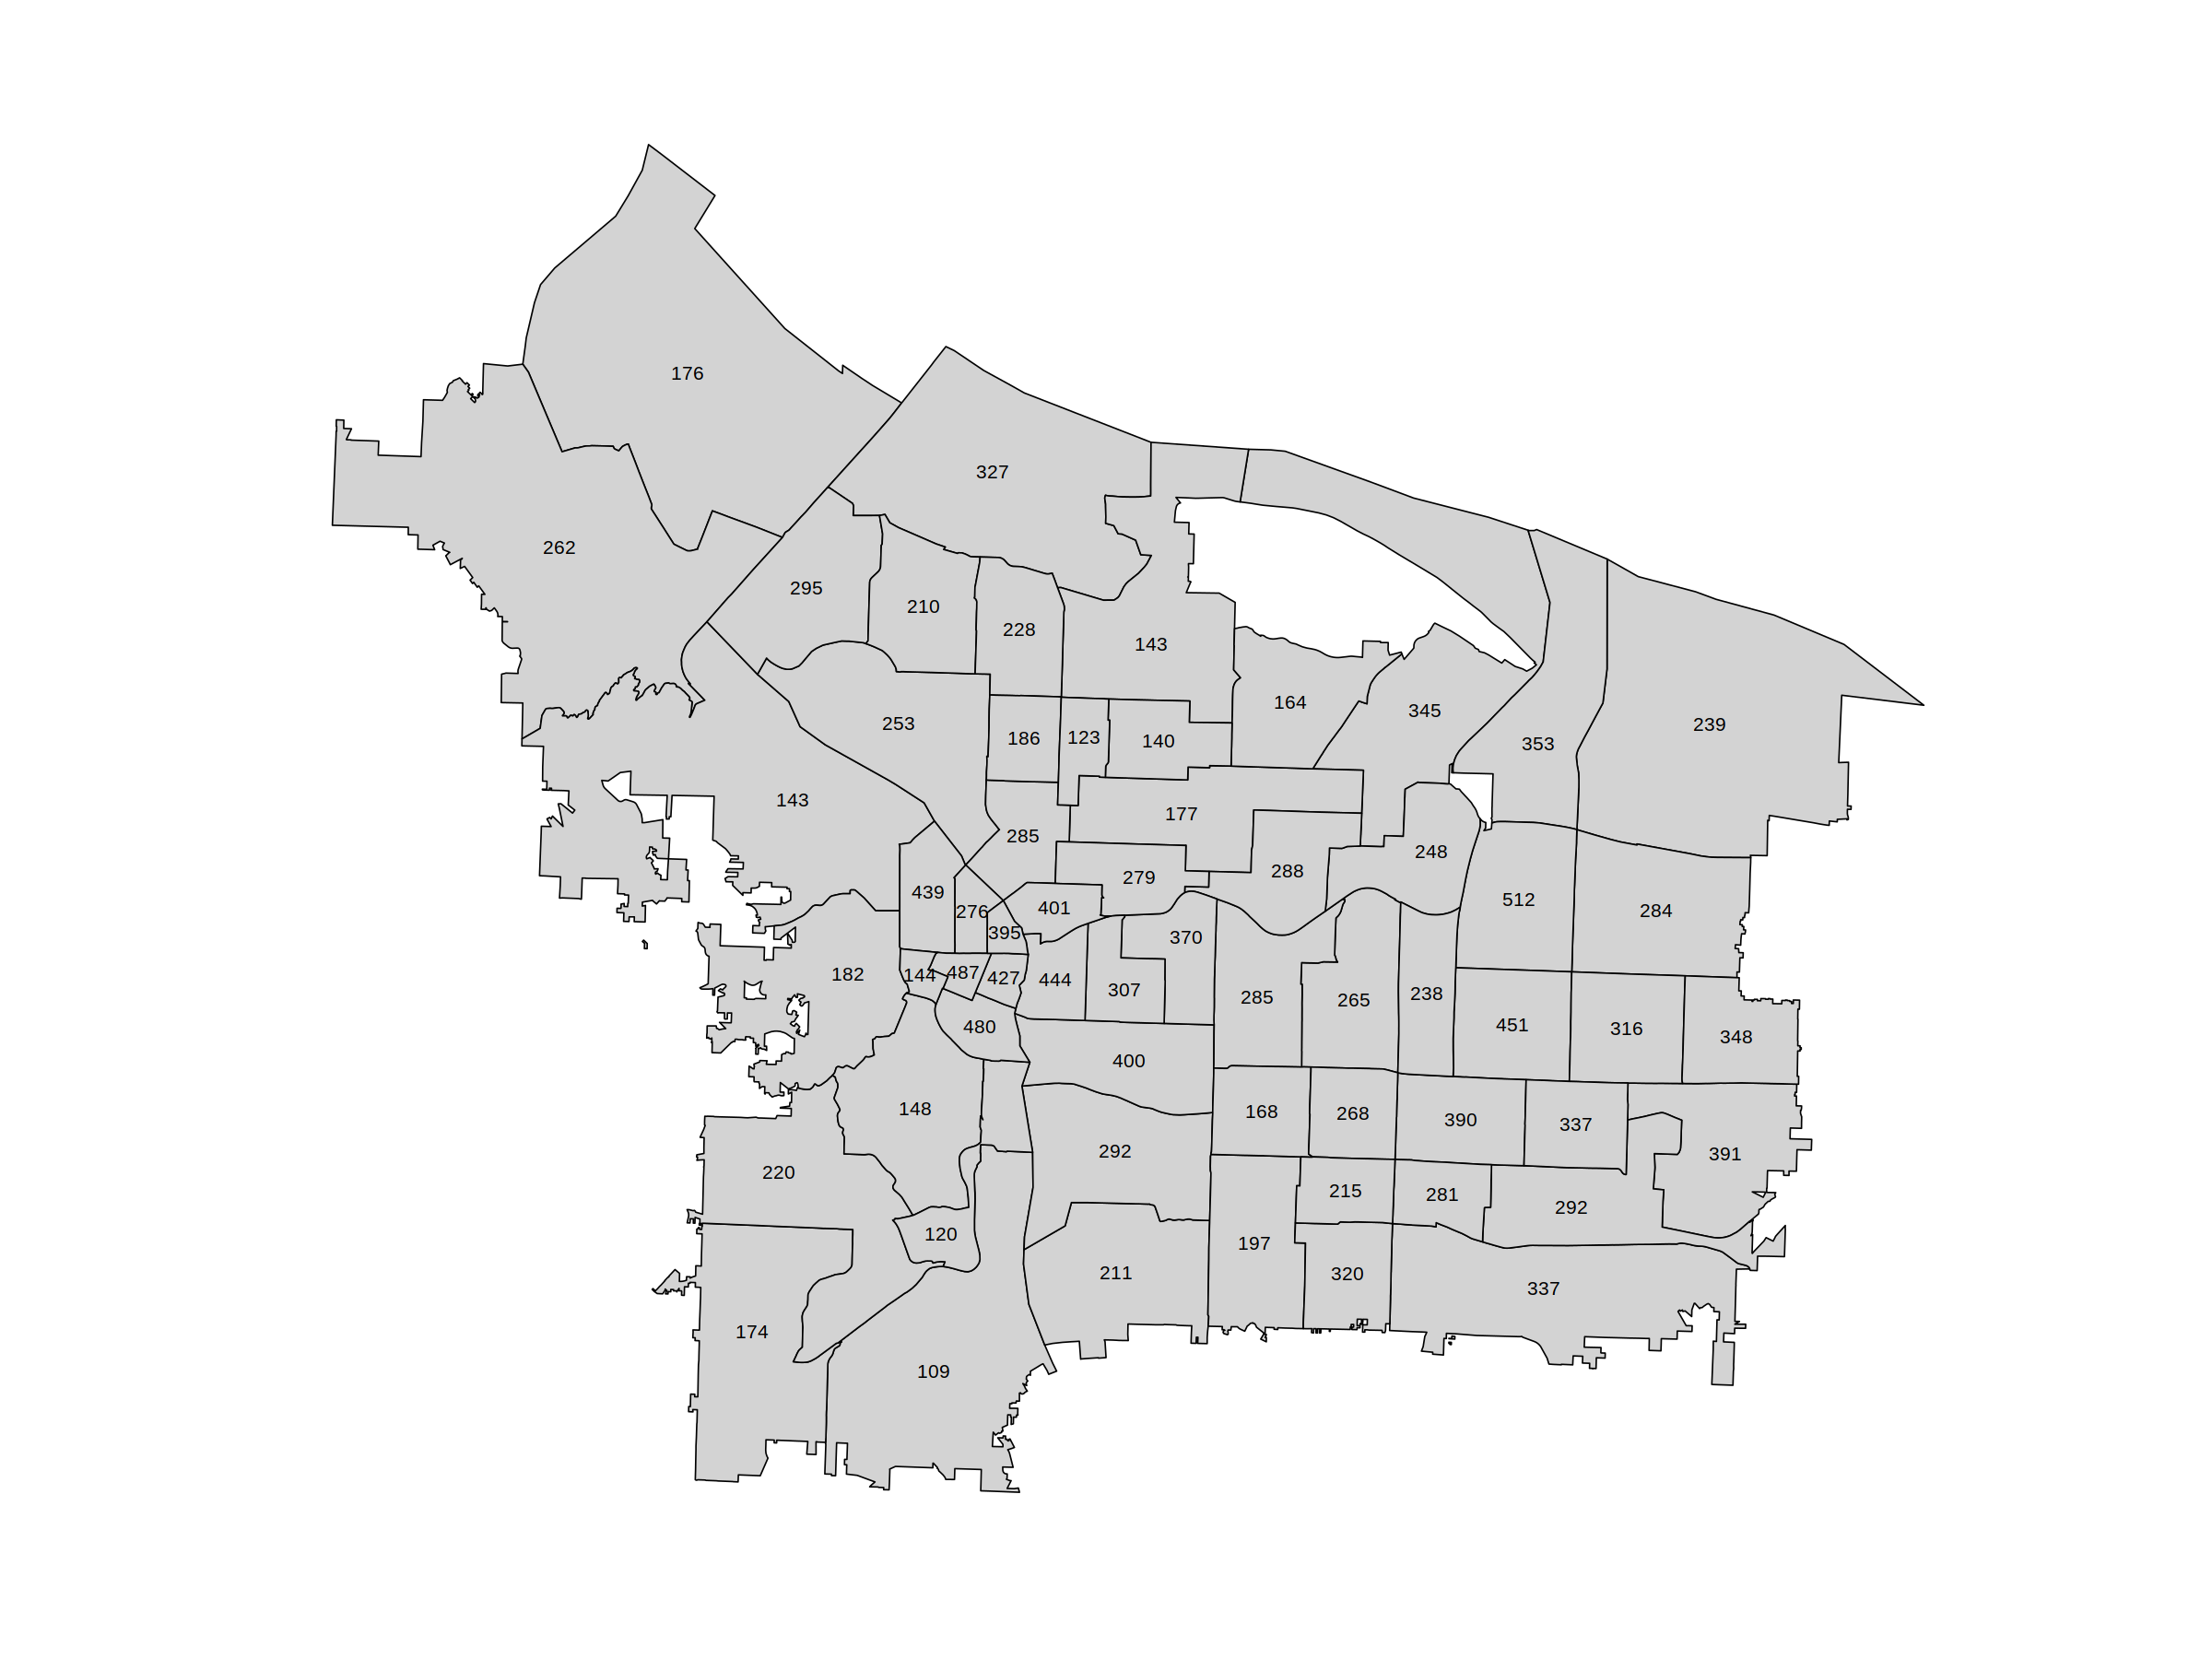

In [22]:
# Label the polygons using the new CRIME_COUNT field
# The polygonsLabel function has many useful options:
# https://www.rdocumentation.org/packages/rgeos/versions/0.5-2/topics/polygonsLabel

options(repr.plot.width=20, repr.plot.height=15)
plot(port, col = "lightgray")
port_centroids = polygonsLabel(port, port$CRIME_COUNT, method = "buffer", doPlot = TRUE)

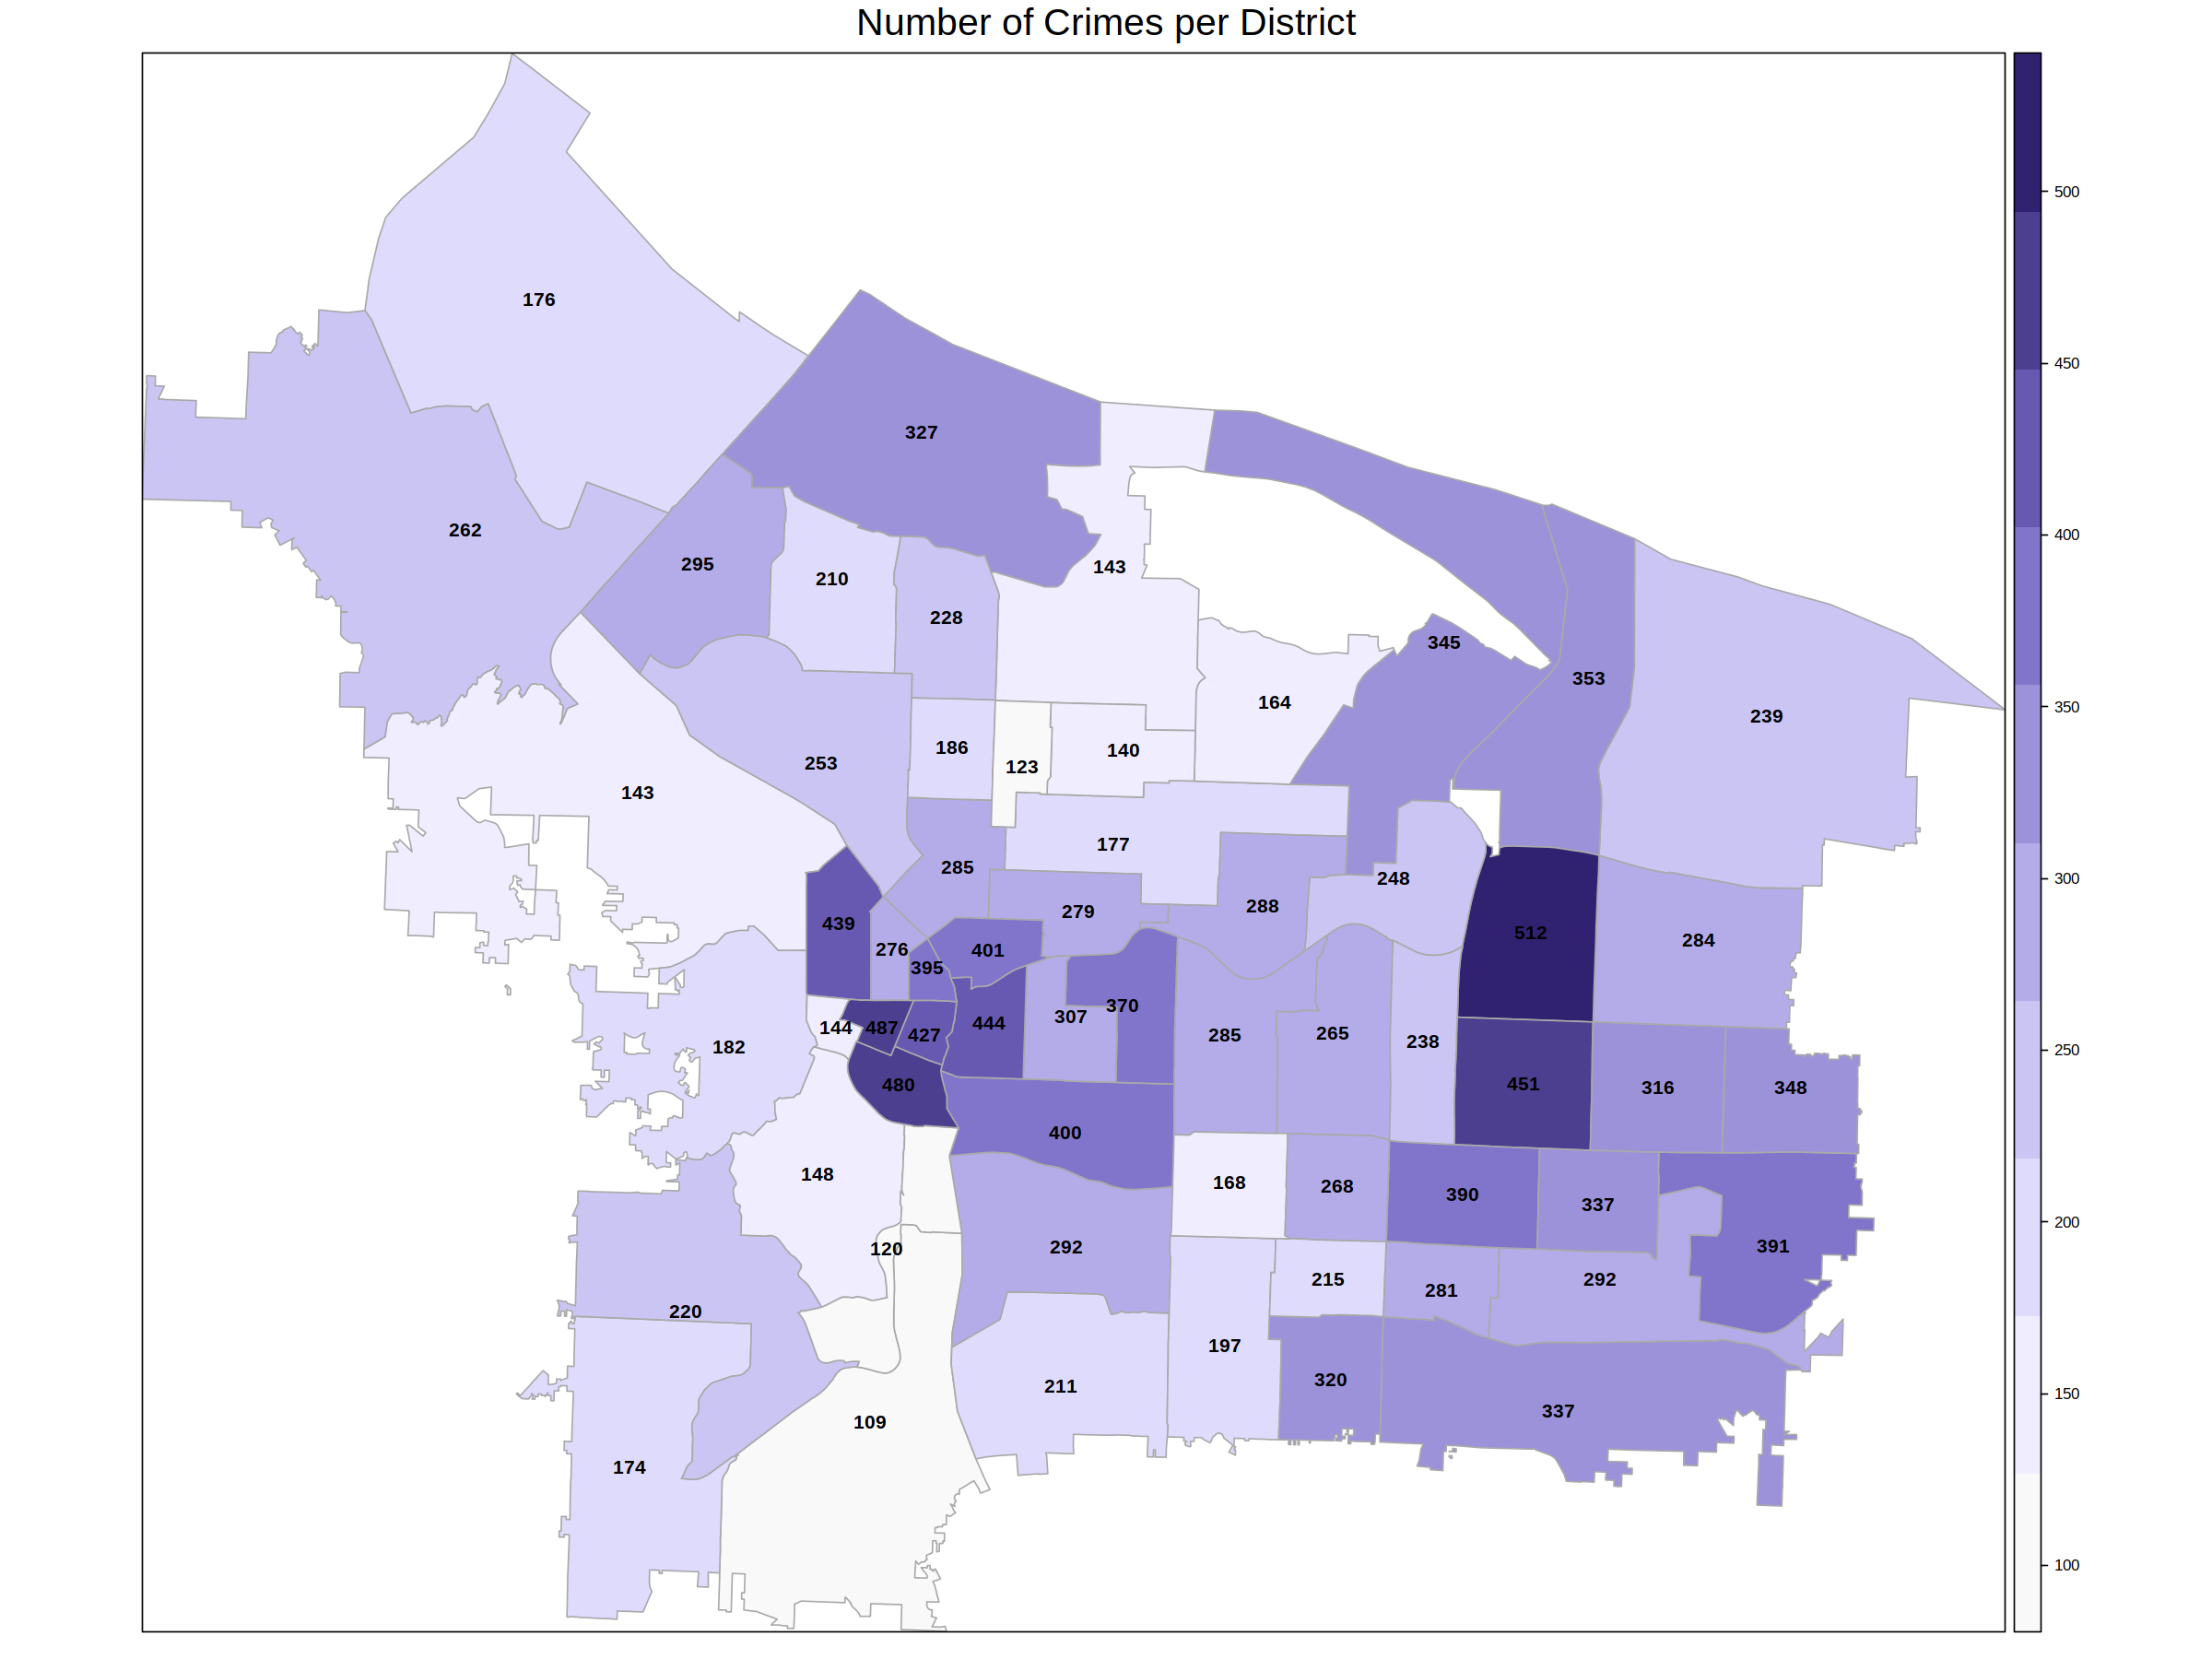

In [23]:
options(repr.plot.width=20, repr.plot.height=15)

# Symbolize the polygons using the CRIME_COUNT field
# hcl.pals("sequential") will show you a list of all available sequential palettes

# More to read
# https://fukamilab.github.io/BIO202/08-A-mapping.html

# Palettes are a PITA - https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/palettes.html

# Best HOWTO!!:
# http://www.nickeubank.com/wp-content/uploads/2015/10/RGIS3_MakingMaps_part1_mappingVectorData.html

# port_centroids <- coordinates(port) # OLD, DON"T USE
port_centroids <- coordinates(rgeos::gPointOnSurface(port, byid=TRUE))

l1 = list("sp.text", port_centroids, as.character(port@data$CRIME_COUNT),col="black", cex=1, font=2)

# color palette defined with breaks
my_colors <- hcl.colors(10, "Purples 3", rev = TRUE)

spplot(port, 
       zcol="CRIME_COUNT",      # column to use for gradient
       sp.layout=list(l1),      # layout instructions for labels
       col.regions = my_colors, # palette to use
       cuts = 9,                # number of numbers to put on legend
       col = "darkgray",        # border line color
       main=list(label="Number of Crimes per District",cex=2,font=1)  # Title
)